In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
from sklearn.datasets import load_boston

In [20]:
X,Y = load_boston(return_X_y=True)

In [30]:
X.shape

(506, 13)

In [22]:
Y = np.expand_dims(Y,axis=1)
Y.shape

(506, 1)

In [23]:
bunch = load_boston()

In [24]:
Predictors = pd.DataFrame(X,columns=bunch.feature_names)

In [25]:
Responses = pd.DataFrame(Y,columns=['Price'])

In [14]:
DF = pd.concat([Predictors,Responses],axis=1)

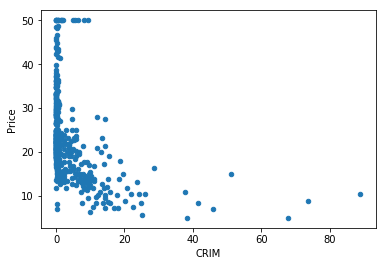

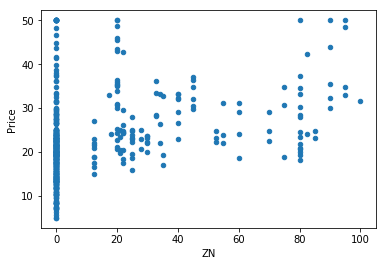

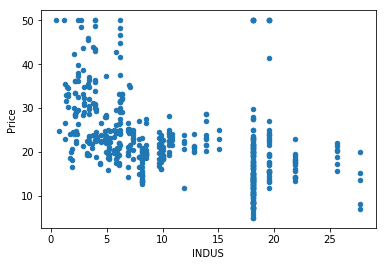

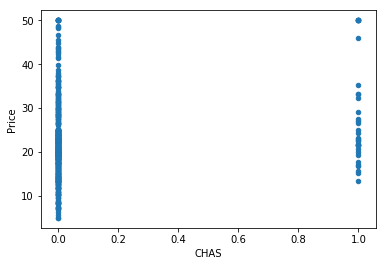

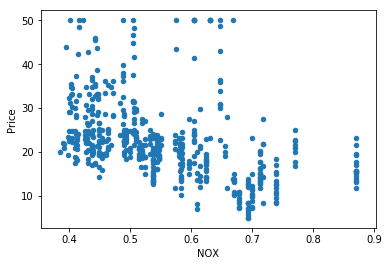

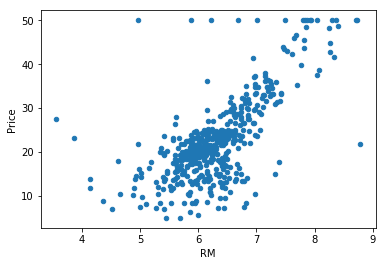

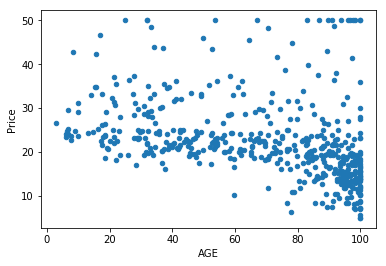

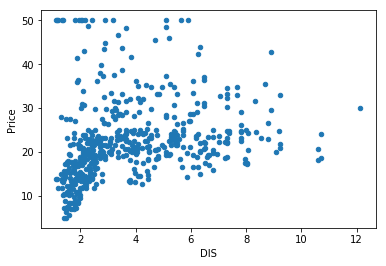

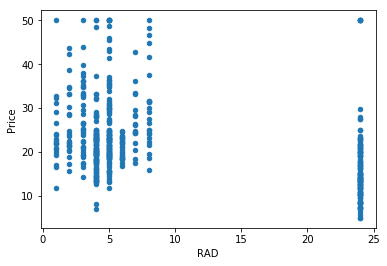

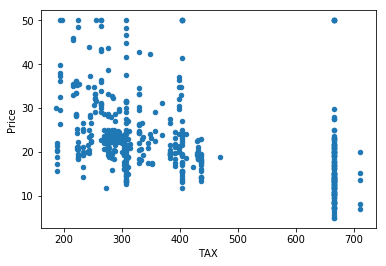

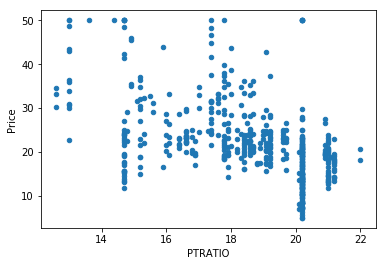

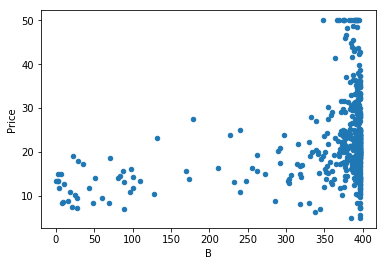

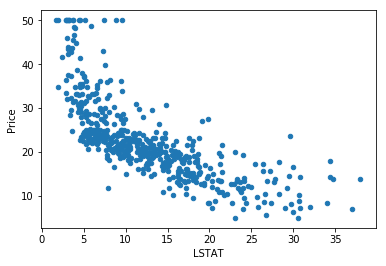

In [19]:
for i in Predictors.columns:
    DF.plot.scatter(x=i,y='Price')

In [29]:
Test = np.array(DF.sample(10))
Test.shape
TestX = Test[:,:-1]
TestY = Test[:,[-1]]
print("X.shape = {} Y.shape {}".format(TestX.shape,TestY.shape))

X.shape = (10, 13) Y.shape (10, 1)


In [217]:
minX = np.array(Predictors.min(axis=0))
minX = np.expand_dims(minX,axis=0)
maxX = np.array(Predictors.max(axis=0))
maxX = np.expand_dims(maxX,axis=0)
minY = np.array(Responses.min(axis=0))
minY = np.expand_dims(minY,axis=0)
maxY = np.array(Responses.max(axis=0))
maxY = np.expand_dims(maxY,axis=0)

In [371]:
def scaler(vals,low,high):
    return (vals-low)/(high-low)

def featureEngineer(vals):
    return np.hstack((vals,vals[:,[2]]*vals[:,[4]]))

def batchGradientDescent(weights,DataX,DataY,eta,beta,l1_ratio):
    print('Loss = {}'.format((DataX@weights-DataY).T@(DataX@weights-DataY)))
    newWeights = (weights
        -eta*DataX.T@(DataX@weights-DataY)
        -beta*l1_ratio*np.sign(weights)
        -beta*(1-l1_ratio)*weights)
    return (DataX@weights-DataY).T@(DataX@weights-DataY), newWeights

#TestW = np.random.randn(13,1)
Loss , TestW = batchGradientDescent(TestW,TestX,TestY,1e-7,0,0.1)


Loss = [[304013.24049646]]


In [372]:
#TestW = np.random.randn(13,1)
## Test our functions
print(scaler(TestX,minX,maxX).shape)
print(featureEngineer(TestX).shape)
print(batchGradientDescent(TestW,TestX,TestY,1e-3,1e-3,0.1))

(10, 13)
(10, 14)
Loss = [[154892.84428231]]
(array([[154892.84428231]]), array([[  -7.49190323],
       [   1.2232439 ],
       [ -15.05147275],
       [   1.21214688],
       [   0.56914451],
       [  -7.78087799],
       [ -83.35762797],
       [  -1.54830755],
       [ -18.85011955],
       [-544.71213101],
       [ -16.19044457],
       [-277.60925703],
       [ -16.40497531]]))


In [392]:
## after feature engineering I end up with 14 weights
#W = np.random.randn(14,1)

def pipeline(weights,DataX,DataY,eta,beta,l1_ratio,lowX,highX,lowY,highY):
    ScaledX = scaler(DataX,lowX,highX)
    ScaledY = scaler(DataY,lowY,highY)
    EnggX = featureEngineer(ScaledX)
    Loss, newWeights = batchGradientDescent(weights,EnggX,ScaledY,eta,beta,l1_ratio)
    return Loss, newWeights
    
L, W = pipeline(W,TestX,TestY,1e-2,0,0,minX,maxX,minY,maxY)

Loss = [[8.39481129]]


In [397]:
batch = 3
W = np.random.randn(14,1)
Losses = []
for i in range(1000):
    ## this is where you read in your batch
    Sample = np.array(DF.sample(10))
    SampleX = Sample[:,:-1]
    SampleY = Sample[:,[-1]]
    Loss, W = pipeline(W,SampleX,SampleY,1e-3,1e-2,0.1,minX,maxX,minY,maxY)
    Losses.append(float(Loss))

Loss = [[66.33757184]]
Loss = [[40.50606554]]
Loss = [[56.43638504]]
Loss = [[27.2423802]]
Loss = [[58.15906926]]
Loss = [[41.80813589]]
Loss = [[37.31910787]]
Loss = [[27.6588911]]
Loss = [[24.29470242]]
Loss = [[25.38691605]]
Loss = [[23.04603235]]
Loss = [[29.36770251]]
Loss = [[12.84480382]]
Loss = [[21.76460514]]
Loss = [[17.20093083]]
Loss = [[15.10380033]]
Loss = [[14.5365267]]
Loss = [[8.29412624]]
Loss = [[14.06192353]]
Loss = [[15.21759314]]
Loss = [[17.68860482]]
Loss = [[15.78109103]]
Loss = [[9.51883306]]
Loss = [[10.40912183]]
Loss = [[6.74631956]]
Loss = [[6.25584853]]
Loss = [[6.10005968]]
Loss = [[4.11827376]]
Loss = [[4.50010382]]
Loss = [[4.34069624]]
Loss = [[4.85593475]]
Loss = [[8.27936417]]
Loss = [[4.49815355]]
Loss = [[3.23550011]]
Loss = [[2.41001726]]
Loss = [[4.15118914]]
Loss = [[3.80515457]]
Loss = [[4.21928875]]
Loss = [[3.11749878]]
Loss = [[3.11166348]]
Loss = [[4.17171759]]
Loss = [[4.90430505]]
Loss = [[3.12546961]]
Loss = [[2.47784198]]
Loss = [[4.42

Loss = [[0.33985747]]
Loss = [[0.74597649]]
Loss = [[1.24474238]]
Loss = [[1.49253329]]
Loss = [[0.37195485]]
Loss = [[0.36268389]]
Loss = [[1.32212655]]
Loss = [[0.84713534]]
Loss = [[0.46649319]]
Loss = [[1.16548323]]
Loss = [[0.45528405]]
Loss = [[1.39121489]]
Loss = [[0.79670502]]
Loss = [[1.02832735]]
Loss = [[1.06811474]]
Loss = [[0.60561776]]
Loss = [[1.25521701]]
Loss = [[0.54972224]]
Loss = [[0.93686032]]
Loss = [[0.64468768]]
Loss = [[0.66489033]]
Loss = [[0.6095434]]
Loss = [[0.52694832]]
Loss = [[0.53578079]]
Loss = [[1.09892361]]
Loss = [[0.74522521]]
Loss = [[1.65105594]]
Loss = [[0.71155693]]
Loss = [[1.07949758]]
Loss = [[0.33644732]]
Loss = [[1.77700684]]
Loss = [[1.09647573]]
Loss = [[0.92485129]]
Loss = [[0.27245974]]
Loss = [[0.56839178]]
Loss = [[0.51961358]]
Loss = [[0.36323184]]
Loss = [[1.60544125]]
Loss = [[0.48651108]]
Loss = [[2.05175336]]
Loss = [[0.88522591]]
Loss = [[0.50646419]]
Loss = [[1.06472651]]
Loss = [[0.51087191]]
Loss = [[0.78551397]]
Loss = [[0.

In [398]:
Losses

[66.33757183735268,
 40.50606554213897,
 56.43638503737234,
 27.242380204359236,
 58.15906926011763,
 41.80813588544701,
 37.31910787204426,
 27.65889109536869,
 24.294702416093187,
 25.386916053084057,
 23.046032352058283,
 29.36770251038094,
 12.844803821034745,
 21.764605137257288,
 17.20093083293157,
 15.103800334903982,
 14.53652670201407,
 8.294126236042413,
 14.061923533995595,
 15.217593139383144,
 17.68860482227028,
 15.781091033021506,
 9.518833057220098,
 10.40912183057172,
 6.7463195571650365,
 6.255848529957496,
 6.100059675075501,
 4.118273762788737,
 4.500103815014924,
 4.340696237361426,
 4.855934746120849,
 8.27936417258467,
 4.498153545939392,
 3.235500110800617,
 2.410017256292905,
 4.151189139776272,
 3.8051545707965264,
 4.2192887466086875,
 3.1174987811456343,
 3.111663481606265,
 4.17171758839251,
 4.904305048773891,
 3.1254696072469157,
 2.4778419845827004,
 4.426832723024903,
 1.680433254368596,
 1.8179814355114008,
 1.1503504330888896,
 1.4594652742202943,
 1.

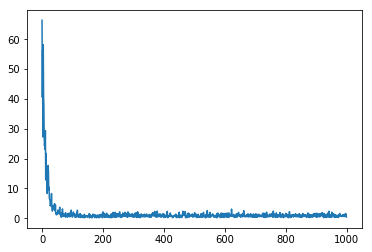

In [399]:
plt.plot(Losses)